Численность населения Республики Казахстан по полу и отдельным возрастным группам (0-15, 16-62(58), 63(59)+)

In [1]:
# загрузка библиотек
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from scipy.stats.stats import pearsonr
import scipy
from matplotlib import pyplot as plt
from matplotlib import rc
import seaborn as sb
from pylab import rcParams
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
data = pd.read_csv('123.csv')
data

men_0-15  men_16-62  women_0-15  women_59+                  region  \
0    2746474    5478291     2826185    1421491    Республика Казахстан   
1      89694     200734       92377      57822   Западно-Казахстанская   
2     123064     194942      128471      32427           Мангистауская   
3     168607     421437      170609     155747  Восточно-Казахстанская   
4      94989     231620       96016      73724             Акмолинская   
5     199841     317804      203356      74340              Жамбылская   
6     155271     327121      167370      57255            город Астана   
7     129297     261719      133876      61047             Актюбинская   
8     174479     421267      176379     141725          Карагандинская   
9     566429     232394       92831      79768            Павлодарская   
10    213568     558515      226062     153714            город Алматы   
11    331190     601146      340495     139741             Алматинская   
12     95717     277539       95901      98107            Костанайская   
13     91834     173489       63250      69656    Северо-Казахстанская   
14    179531     282939      169082      51940           город Шымкент   
15    109364     184608      113321      36229              Атырауская   
16    139537     234591      142980      43739          Кызылординская   
17     63593     556426      403360      94510           Туркестанская   

    women_16-58  men_63+  
0       5393387   608720  
1        192154    23145  
2        187814    14512  
3        403442    65799  
4        215600    30883  
5        304658    33079  
6        344856    23131  
7        261841    25616  
8        414480    56578  
9        229660    31615  
10       642374    62696  
11       567927    68537  
12       269279    40922  
13       160250    28477  
14       303491    22103  
15       177702    14562  
16       217360    20826  
17       500499    46239

In [3]:
data.n=data
data.n

C:\Users\birle\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


men_0-15  men_16-62  women_0-15  women_59+                  region  \
0    2746474    5478291     2826185    1421491    Республика Казахстан   
1      89694     200734       92377      57822   Западно-Казахстанская   
2     123064     194942      128471      32427           Мангистауская   
3     168607     421437      170609     155747  Восточно-Казахстанская   
4      94989     231620       96016      73724             Акмолинская   
5     199841     317804      203356      74340              Жамбылская   
6     155271     327121      167370      57255            город Астана   
7     129297     261719      133876      61047             Актюбинская   
8     174479     421267      176379     141725          Карагандинская   
9     566429     232394       92831      79768            Павлодарская   
10    213568     558515      226062     153714            город Алматы   
11    331190     601146      340495     139741             Алматинская   
12     95717     277539       95901      98107            Костанайская   
13     91834     173489       63250      69656    Северо-Казахстанская   
14    179531     282939      169082      51940           город Шымкент   
15    109364     184608      113321      36229              Атырауская   
16    139537     234591      142980      43739          Кызылординская   
17     63593     556426      403360      94510           Туркестанская   

    women_16-58  men_63+  
0       5393387   608720  
1        192154    23145  
2        187814    14512  
3        403442    65799  
4        215600    30883  
5        304658    33079  
6        344856    23131  
7        261841    25616  
8        414480    56578  
9        229660    31615  
10       642374    62696  
11       567927    68537  
12       269279    40922  
13       160250    28477  
14       303491    22103  
15       177702    14562  
16       217360    20826  
17       500499    46239

In [4]:
x = data.n.iloc[:, :-1]
y = data.n.iloc[:, 4]

## КОРРЕЛЯЦИЯ

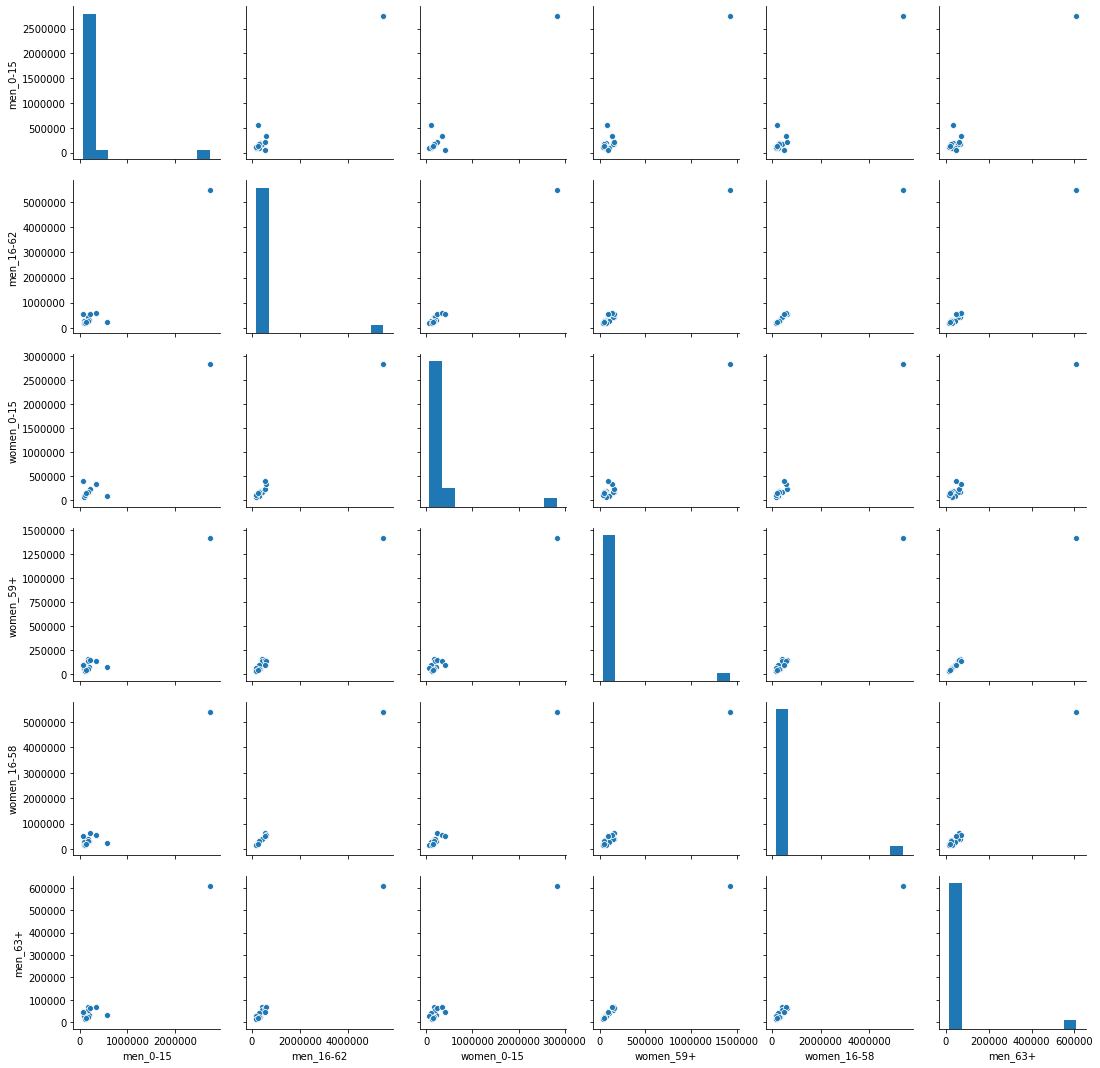

In [4]:
x = data.n[['men_0-15' ,'men_16-62', 'women_0-15', 'women_59+', 'region','women_16-58','men_63+']]
sb.pairplot(x)

In [5]:
x = data.n[['men_0-15' ,'women_0-15', 'women_59+', 'men_63+']]
x.corr()

men_0-15  women_0-15  women_59+   men_63+
men_0-15    1.000000    0.974172   0.980358  0.980057
women_0-15  0.974172    1.000000   0.990490  0.992385
women_59+   0.980358    0.990490   1.000000  0.999749
men_63+     0.980057    0.992385   0.999749  1.000000

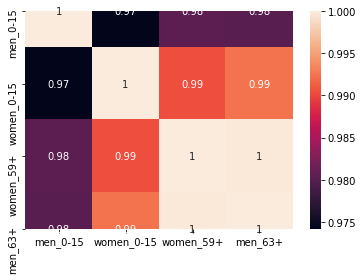

In [6]:
import seaborn as sns

cols = ['men_0-15' ,'women_0-15', 'women_59+', 'men_63+']
hm = sns.heatmap(data.n[cols].corr(),
                 cbar=True,
                 annot=True)